# CICIDS

The CICIDS2017 dataset is a comprehensive dataset for network intrusion detection, created by the Canadian Institute for Cybersecurity. It includes a diverse set of attack scenarios and normal traffic, making it suitable for training and evaluating intrusion detection systems.

The dataset includes various types of attacks such as Brute Force, Heartbleed, Botnet, DoS (Denial of Service), DDoS (Distributed Denial of Service), Web attacks, and Infiltration of the network from inside.

In [1]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## Step 1. EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df_train = pd.read_csv("./data/original/Tuesday-WorkingHours.pcap_ISCX.csv")

In [3]:
df_train.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df_train.shape

(445909, 79)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             445909 non-null  int64  
 1    Flow Duration                445909 non-null  int64  
 2    Total Fwd Packets            445909 non-null  int64  
 3    Total Backward Packets       445909 non-null  int64  
 4   Total Length of Fwd Packets   445909 non-null  int64  
 5    Total Length of Bwd Packets  445909 non-null  int64  
 6    Fwd Packet Length Max        445909 non-null  int64  
 7    Fwd Packet Length Min        445909 non-null  int64  
 8    Fwd Packet Length Mean       445909 non-null  float64
 9    Fwd Packet Length Std        445909 non-null  float64
 10  Bwd Packet Length Max         445909 non-null  int64  
 11   Bwd Packet Length Min        445909 non-null  int64  
 12   Bwd Packet Length Mean       445909 non-nul

In [6]:
df_train.describe()

c:\Users\Harman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Harman\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,445909.000000,4.459090e+05,445909.000000,445909.000000,4.459090e+05,4.459090e+05,445909.000000,445909.000000,445909.000000,445909.000000,...,445909.000000,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05,4.459090e+05
mean,8878.375745,1.077944e+07,11.800473,13.907212,5.302105e+02,2.186324e+04,173.346669,20.579979,48.528489,49.897094,...,2.088341,-1.321786e+04,7.265964e+04,4.670517e+04,1.642092e+05,4.828426e+04,3.294459e+06,1.497105e+05,3.407025e+06,3.145407e+06
std,19522.889728,2.955629e+07,867.072428,1172.161547,5.676904e+03,2.625768e+06,472.450792,38.938350,113.195021,146.736325,...,6.325197,2.666478e+06,6.205625e+05,3.601504e+05,1.049887e+06,5.649489e+05,1.258776e+07,1.982346e+06,1.293249e+07,1.240892e+07
min,0.000000,-4.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.860000e+02,2.000000,1.000000,4.000000e+00,0.000000e+00,1.000000,0.000000,0.857143,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.128800e+04,2.000000,2.000000,6.800000e+01,1.360000e+02,41.000000,0.000000,37.000000,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,4.668200e+05,4.000000,2.000000,1.500000e+02,3.360000e+02,62.000000,41.000000,50.000000,21.920310,...,2.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65505.000000,1.200000e+08,206446.000000,276072.000000,2.428415e+06,6.270000e+08,24820.000000,2065.000000,4672.000000,5398.072094,...,1846.000000,1.380000e+02,1.070000e+08,2.410000e+07,1.070000e+08,1.070000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08


In [7]:
df_train.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

## Step 2. Data Cleaning

### A. Missing values

In [8]:
print(df_train.isna().sum().sum())

201


In [9]:
df_train.dropna(subset=["Flow Bytes/s"], inplace=True)

In [10]:
print(df_train.isna().sum().sum())

0


### Inf. values

In [11]:
df_train = df_train.replace([np.inf, -np.inf], np.nan).dropna()

## Step 3. Data Preparation

### A. Categorical data

In [12]:
categorical_columns = df_train.select_dtypes(include=['object']).columns

for column in categorical_columns:
	print(f"Column '{column}' contains {len(df_train[column].value_counts())} unique values, namely {df_train[column].unique().tolist()}")

Column ' Label' contains 3 unique values, namely ['BENIGN', 'FTP-Patator', 'SSH-Patator']


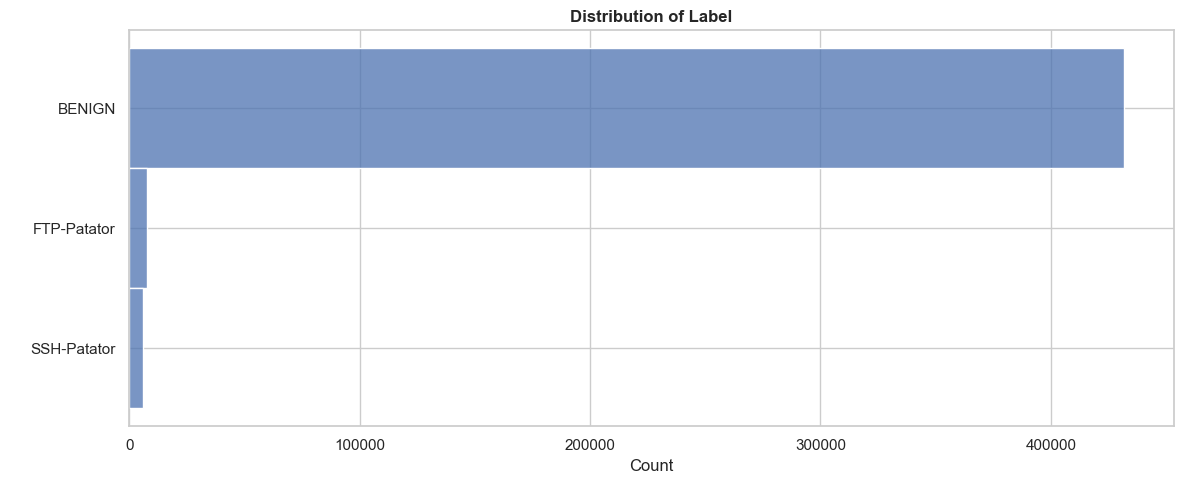

In [13]:
df = df_train

plt.figure(figsize=(12, 5))
sns.histplot(data=df, y=df[" Label"])
plt.ylabel(" ")
plt.title(f"Distribution of Label", fontweight="bold")

plt.tight_layout()
plt.show()

## Step 4. Preparing dataset for modeling

### A. Normalise numeric features

In [14]:
# Get all numerical columns
numerical_columns = df_train.select_dtypes(include="number").columns

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

### B. Map Labels to Multi-class

In [16]:
df_train[" Label"].value_counts()

 Label
BENIGN         431813
FTP-Patator      7935
SSH-Patator      5897
Name: count, dtype: int64

In [17]:
attack_mapping = {
	"BENIGN": 0,
	"FTP-Patator": 1,
	"SSH-Patator": 2,
}

df_train[" Label"] = df_train[" Label"].map(attack_mapping)

In [18]:
df_train[" Label"].value_counts()

 Label
0    431813
1      7935
2      5897
Name: count, dtype: int64

### C. Data Splitting

In [19]:
X = df_train.drop(columns=" Label")
y = df_train[" Label"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### D. Apply SMOTE to balance the training data

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [22]:
# Check class distribution after SMOTE
from collections import Counter

print(f"Class distribution before SMOTE: {Counter(y_train)}")
print(f"Class distribution after SMOTE: {Counter(y_train_balanced)}")

Class distribution before SMOTE: Counter({0: 345503, 1: 6348, 2: 4665})
Class distribution after SMOTE: Counter({0: 345503, 2: 345503, 1: 345503})


### E. PyTorch Model Design

In [23]:
import torch
import torch.nn as nn

class NetworkIDSModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NetworkIDSModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

# Define the input size (number of features), hidden layers, and output size (number of classes)
input_size = X_train_balanced.shape[1]
hidden_size = 64  # You can experiment with this
output_size = len(attack_mapping)  # Depends on binary or multi-class

model = NetworkIDSModel(input_size, hidden_size, output_size)

### F. Training the Model

In [24]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Convert the balanced training data into tensors for PyTorch
X_train_tensor = torch.tensor(X_train_balanced.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
	total_loss = 0
	correct = 0
	total = 0
	
	for data, labels in train_loader:
		# Zero the gradients
		optimizer.zero_grad()
		
		# Forward pass
		outputs = model(data)
		loss = criterion(outputs, labels)
		
		# Backward pass and optimize
		loss.backward()
		optimizer.step()
		
		# Track loss
		total_loss += loss.item()
		
		# Calculate accuracy
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()
	
	epoch_loss = total_loss / len(train_loader)
	epoch_accuracy = correct / total
	
	print(f'[Epoch {epoch+1}/{num_epochs}]:	loss: {epoch_loss:.4f} ; accuracy: {epoch_accuracy:.4f}')

[Epoch 1/10]:	loss: 0.5735 ; accuracy: 0.9828
[Epoch 2/10]:	loss: 0.5607 ; accuracy: 0.9910
[Epoch 3/10]:	loss: 0.5576 ; accuracy: 0.9941
[Epoch 4/10]:	loss: 0.5560 ; accuracy: 0.9957
[Epoch 5/10]:	loss: 0.5555 ; accuracy: 0.9960
[Epoch 6/10]:	loss: 0.5554 ; accuracy: 0.9961
[Epoch 7/10]:	loss: 0.5553 ; accuracy: 0.9962
[Epoch 8/10]:	loss: 0.5552 ; accuracy: 0.9963
[Epoch 9/10]:	loss: 0.5552 ; accuracy: 0.9963
[Epoch 10/10]:	loss: 0.5552 ; accuracy: 0.9963


### G. Evaluating the Model

In [25]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Convert test data to tensor
# y_test_mapped = y_test.map(attack_mapping).astype(int)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Make predictions
model.eval()
with torch.no_grad():
	outputs = model(X_test_tensor)
	_, predicted = torch.max(outputs.data, 1)

# Calculate accuracy
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), predicted.cpu().numpy())

# Calculate F1 score
f1 = f1_score(y_test_tensor.cpu().numpy(), predicted.cpu().numpy(), average="weighted")

# Generate classification report
report = classification_report(y_test_tensor.cpu().numpy(), predicted.cpu().numpy(),
			target_names=attack_mapping)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"\nClassification Report:\n{report}")

Accuracy: 0.9972
F1 Score: 0.9973

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     86310
 FTP-Patator       0.97      1.00      0.99      1587
 SSH-Patator       0.86      0.99      0.92      1232

    accuracy                           1.00     89129
   macro avg       0.95      0.99      0.97     89129
weighted avg       1.00      1.00      1.00     89129



In [26]:
torch.save(model.state_dict(), './models/ids_model.pth')

In [27]:
model.load_state_dict(torch.load('./models/ids_model.pth', weights_only=True))
model.eval()

NetworkIDSModel(
  (fc1): Linear(in_features=78, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)